<a href="https://colab.research.google.com/github/yagipong/Logistic_Random_Forest_KNN/blob/main/Logistic%2C_Random_Forest%2C_or_KNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Logistic, Random Forest, or KNN

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report, ConfusionMatrixDisplay
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE, RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
path = '/content/drive/MyDrive/CD_DS/2_Machine_Learning/Week_3/Assignments/Core/wisconsinBreastCancer - wisconsinBreastCancer.csv'
df = pd.read_csv(path)
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


##Logistic Regression Model

In [ ]:
df['diagnosis'] = df['diagnosis'].replace({'B':0, 'M':1})

In [ ]:
X = df.drop(columns = 'diagnosis')
y = df['diagnosis']

X_train, X_test, y_train, y_test = train_test_split(X,
                                                   y,
                                                   test_size=0.3, 
                                                   random_state=42, 
                                                   stratify=y)

In [ ]:
logreg = LogisticRegression(C = 1000, solver = 'liblinear')
scaler = StandardScaler()
logreg_pipe = make_pipeline(scaler, logreg)
logreg_pipe.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression',
                 LogisticRegression(C=1000, solver='liblinear'))])

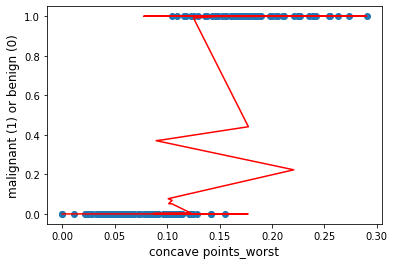

In [ ]:
plot_df = pd.DataFrame(data = {'worst_concave_points': X_test['concave points_worst'], 'diagnosis': y_test})
plot_df['logistic_preds'] = pd.DataFrame(logreg_pipe.predict_proba(X_test)).loc[:, 1].values
plot_df = plot_df.sort_values(['logistic_preds'])

plt.scatter(X_test['concave points_worst'], y_test)
plt.plot(plot_df['worst_concave_points'], plot_df['logistic_preds'].values, color = 'red')
plt.ylabel('malignant (1) or benign (0)', fontsize = 12)
plt.xlabel('concave points_worst', fontsize =12);

In [ ]:
print(logreg_pipe.score(X_train, y_train))
print(logreg_pipe.score(X_test, y_test))

1.0
0.9415204678362573


In [ ]:
logreg_pipe_pred = logreg_pipe.predict(X_test)
logreg_pipe_accuracy = accuracy_score(y_test, logreg_pipe_pred)
print(logreg_pipe_accuracy)

0.9415204678362573


In [ ]:
logreg_pipe_recall = recall_score(y_test,logreg_pipe_pred)
print(logreg_pipe_recall)

0.875


In [ ]:
logreg_pipe_precision = precision_score(y_test,logreg_pipe_pred)
print(logreg_pipe_precision)

0.9655172413793104


###L1 Regularization

In [ ]:
c_values = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000]
train_scores = []
test_scores = []

for c in c_values:
  log_reg = LogisticRegression(C = c, max_iter = 1000, solver = 'liblinear', penalty = 'l1')
  log_reg_pipe = make_pipeline(scaler, log_reg)
  log_reg_pipe.fit(X_train, y_train)
  
  train_scores.append(log_reg_pipe.score(X_train, y_train))
  test_scores.append(log_reg_pipe.score(X_test, y_test))

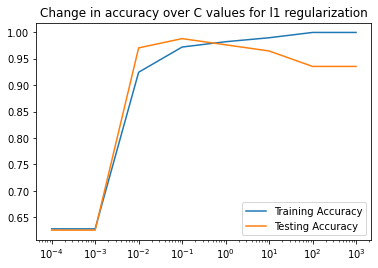

In [ ]:
fig, ax = plt.subplots(1,1)
ax.plot(c_values, train_scores, label = 'Training Accuracy')
ax.plot(c_values, test_scores, label = 'Testing Accuracy')
ax.set_xticks(c_values)
ax.set_title('Change in accuracy over C values for l1 regularization')
ax.legend()
ax.set_xscale('log')

In [ ]:
{c:score for c, score in zip(c_values, test_scores)}

{0.0001: 0.6257309941520468,
 0.001: 0.6257309941520468,
 0.01: 0.9707602339181286,
 0.1: 0.9883040935672515,
 1: 0.9766081871345029,
 10: 0.9649122807017544,
 100: 0.935672514619883,
 1000: 0.935672514619883}

###L2 Regularization

In [ ]:
c_values = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000]
train_scores = []
test_scores = []

for c in c_values:
  log_reg = LogisticRegression(C = c, max_iter = 1000, solver = 'liblinear', penalty = 'l2')
  log_reg_pipe = make_pipeline(scaler, log_reg)
  log_reg_pipe.fit(X_train, y_train)
  
  train_scores.append(log_reg_pipe.score(X_train, y_train))
  test_scores.append(log_reg_pipe.score(X_test, y_test))

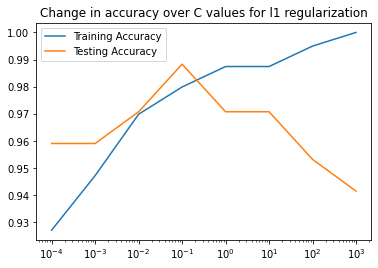

In [ ]:
fig, ax = plt.subplots(1,1)
ax.plot(c_values, train_scores, label = 'Training Accuracy')
ax.plot(c_values, test_scores, label = 'Testing Accuracy')
ax.set_xticks(c_values)
ax.set_title('Change in accuracy over C values for l1 regularization')
ax.legend()
ax.set_xscale('log')

In [ ]:
{c:score for c, score in zip(c_values, test_scores)}

{0.0001: 0.9590643274853801,
 0.001: 0.9590643274853801,
 0.01: 0.9707602339181286,
 0.1: 0.9883040935672515,
 1: 0.9707602339181286,
 10: 0.9707602339181286,
 100: 0.9532163742690059,
 1000: 0.9415204678362573}

##KNN Model

In [ ]:
knn = KNeighborsClassifier(n_neighbors = 1)

In [ ]:
knn.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 1,
 'p': 2,
 'weights': 'uniform'}

In [ ]:
knn_pipe = make_pipeline(scaler, knn)
knn_pipe.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('kneighborsclassifier', KNeighborsClassifier(n_neighbors=1))])

In [ ]:
predictions = knn_pipe.predict(X_test)
predictions

array([1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1])

In [ ]:
acc_score = knn_pipe.score(X_test, y_test)
acc_score

0.9415204678362573

In [ ]:
knn_accuracy = accuracy_score(y_test, predictions)
knn_recall = recall_score(y_test, predictions)
knn_precision = precision_score(y_test, predictions)

print(knn_accuracy)
print(knn_recall)
print(knn_precision)

0.9415204678362573
0.90625
0.9354838709677419


###KNN tuning

In [ ]:
accuracy_score,
krange = range(1, 50)
test_accuracies = []
bestacc = 0
bestk = 0
for k in krange:
  pipe = make_pipeline(StandardScaler(), KNeighborsClassifier(n_neighbors = k))
  pipe.fit(X_train, y_train)
  acc = accuracy_score(y_test, pipe.predict(X_test))
  if acc > bestacc:
    bestacc = acc
    bestk = k

  test_accuracies.append(acc)

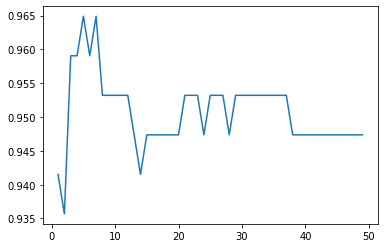

Best K value = 5
Best accuracy on the test set = 0.9649122807017544


In [ ]:
plt.plot(krange, test_accuracies, label = 'Test K Scores')
plt.show()

print(f'Best K value = {bestk}')
print(f'Best accuracy on the test set = {bestacc}')

##Random Forest Model

In [ ]:
rf = RandomForestClassifier(random_state= 42)

In [ ]:
rf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}

In [ ]:
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
rf.predict(X_test)

array([0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1])

In [ ]:
rf_train_score = rf.score(X_train, y_train)
rf_test_score = rf.score(X_test, y_test)
print(rf_train_score)
print(rf_test_score)

1.0
0.9707602339181286


###Random Tree Tuning - max depth and n_estimators

####Max Depth Tuning

In [ ]:
est_depths = [estimator.get_depth()for estimator in rf.estimators_]

In [ ]:
depths = range(1, max(est_depths))
scores = pd.DataFrame(index = depths, columns = ['Test Score'])
for depth in depths:
  model = RandomForestClassifier(max_depth = depth)
  model.fit(X_train, y_train)
  scores.loc[depth, 'Train Score'] = model.score(X_train, y_train)
  scores.loc[depth, 'Test Score'] = model.score(X_test, y_test)
  
scores.head()

,Test Score,Train Score
1,0.918129,0.934673
2,0.953216,0.962312
3,0.959064,0.974874
4,0.953216,0.987437
5,0.964912,0.989950


In [ ]:
sorted_scores = scores.sort_values(by = 'Test Score', ascending = False)
sorted_scores.head()

,Test Score,Train Score
10,0.97076,1.000000
5,0.964912,0.989950
6,0.964912,0.992462
7,0.964912,0.997487
3,0.959064,0.974874


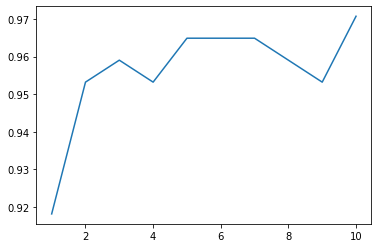

In [ ]:
plt.plot(scores['Test Score']);

####n_estimators Tuning

In [ ]:
n_ests = [50, 100, 150, 200, 250]
scores2 = pd.DataFrame(index = n_ests, columns = ['Test Score', 'Train Score'])
for n in n_ests:
  model = RandomForestClassifier(max_depth = 29, n_estimators = n)
  model.fit(X_train, y_train)
  scores2.loc[n, 'Train Score'] = model.score(X_train, y_train)
  scores2.loc[n, 'Test Score'] = model.score(X_test, y_test)

scores2.head()

,Test Score,Train Score
50,0.97076,1.0
100,0.97076,1.0
150,0.97076,1.0
200,0.964912,1.0
250,0.97076,1.0


In [ ]:
sorted_scores2 = scores2.sort_values(by = 'Test Score', ascending= False)
sorted_scores2.head()

,Test Score,Train Score
50,0.97076,1.0
100,0.97076,1.0
150,0.97076,1.0
250,0.97076,1.0
200,0.964912,1.0


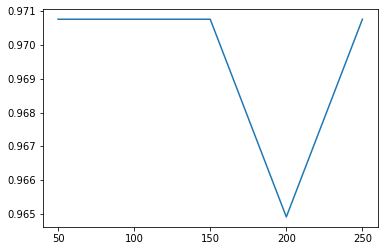

In [ ]:
plt.plot(scores2['Test Score'])
plt.xticks(n_ests);

##Final Questions

1. Which hyperparameters did you tune for each of the models?


For the L1 and L2 regularizations of the logistic regression model, I tuned the C hyperparameter. For the KNN model, I tuned k, the number of neighbors. For the random forest model, I tuned the max depth and the number of estimators.

2. Which model would you put into production to diagnose malignant tumors?

I would use the tuned logistic regression model to diagnose malignant tumors because this model produces the highest scores on accuracy and precision of all the models tested.

3. How does consideration of the meaning of false positive and false negative errors affect how you determine what 'best' means in this case?

In this case, the best model is the one that minimizes false negatives. To save the most lives, doctors should overprescribe trestment for cancer rather than underprescribe.